In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Grouper
from pandas import DataFrame
from numpy import log
from numpy import sqrt

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Gold_data.csv",parse_dates=['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


## outlier checking

<AxesSubplot:xlabel='price'>

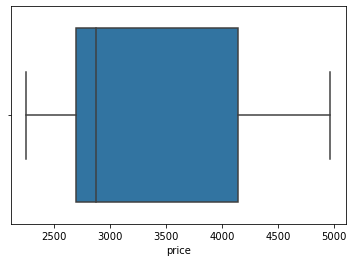

In [3]:
import seaborn as sns
sns.boxplot(df["price"])
# no outlier is present

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [5]:
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [6]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [7]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [8]:
df[df.duplicated()]

,date,price


## data structure required for time series:


In [9]:
df=df.groupby("date").sum()
df.head(5)

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [10]:
df.shape

(2182, 1)

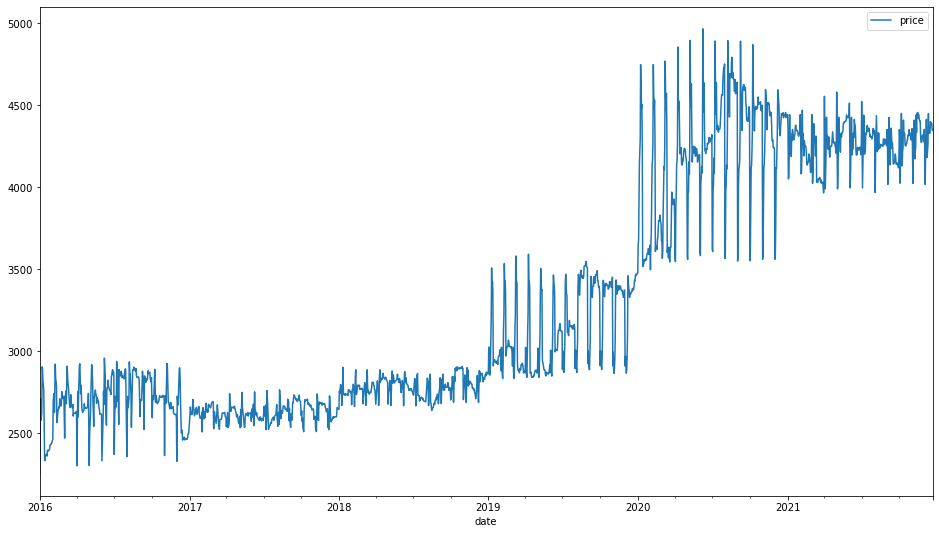

In [11]:
#plt.rc('axes', labelsize=10)
#plt.figure(figsize=(18,10))
df.plot(figsize=(16,9))
plt.show()

In [12]:
# plotting monthly wise data:
df1=df.resample(rule="MS").sum()
df1

,price
date,
2016-01-01,77370.80
2016-02-01,77972.40
2016-03-01,83168.50
2016-04-01,80333.70
2016-05-01,83007.15
...,...
2021-08-01,132212.50
2021-09-01,126225.20
2021-10-01,132963.60


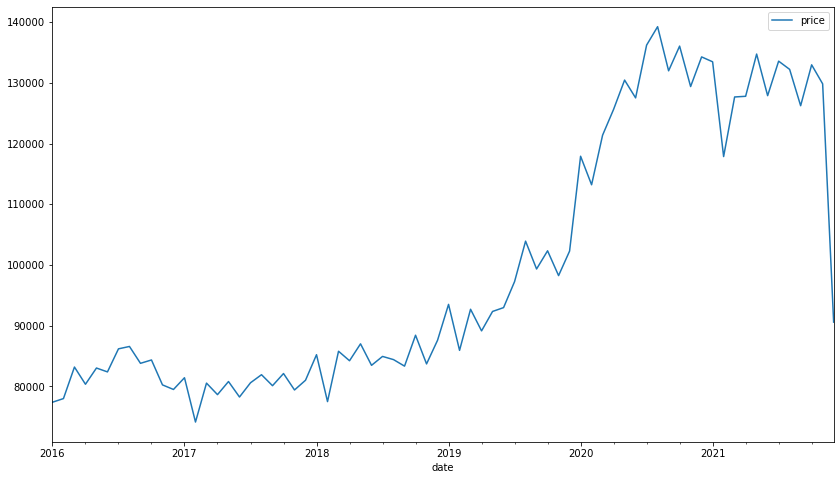

In [13]:
df1.plot(figsize=(14,8))
plt.show()

# there is no seasonality

In [14]:
# plotting year wise:
df2=df.resample(rule="A").sum()
df2

,price
date,
2016-12-31,9.847648e+05
2017-12-31,9.587369e+05
2018-12-31,1.015407e+06
2019-12-31,1.149827e+06
2020-12-31,1.543195e+06
2021-12-31,1.514739e+06


<AxesSubplot:xlabel='date'>

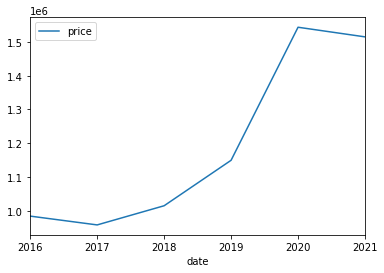

In [15]:
df2.plot()

In [16]:
#dont refer start....

In [17]:
# newly added start:

In [18]:
df.reset_index(inplace=True)

In [19]:
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [20]:
# converting date from object to date
df["date"]=pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [21]:
# fetching year wise data:
gold=df

In [22]:
gold.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [23]:
gold["year"]=df["date"].dt.year
gold.head(2)

,date,price,year
0,2016-01-01,2252.6,2016
1,2016-01-02,2454.5,2016


In [24]:
year_2016=gold[gold["year"]==2016]
year_2017=gold[gold["year"]==2017]
year_2018=gold[gold["year"]==2018]
year_2019=gold[gold["year"]==2019]
year_2020=gold[gold["year"]==2020]
year_2021=gold[gold["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year
 0 2016-01-01  2252.60  2016
 1 2016-01-02  2454.50  2016
 2 2016-01-03  2708.10  2016
 3 2016-01-04  2577.80  2016
 4 2016-01-05  2597.75  2016,
           date        price  year
 361 2016-12-27  2469.300000  2016
 362 2016-12-28  2484.300000  2016
 363 2016-12-29  2498.100000  2016
 364 2016-12-30  2497.800000  2016
 365 2016-12-31  2534.033333  2016)

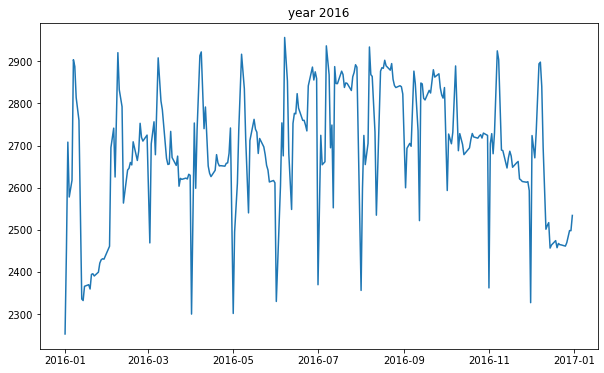

In [25]:
# plotting each year:
plt.figure(figsize=(10,6))
plt.plot(year_2016["date"],year_2016["price"])
plt.title("year 2016")
plt.show()


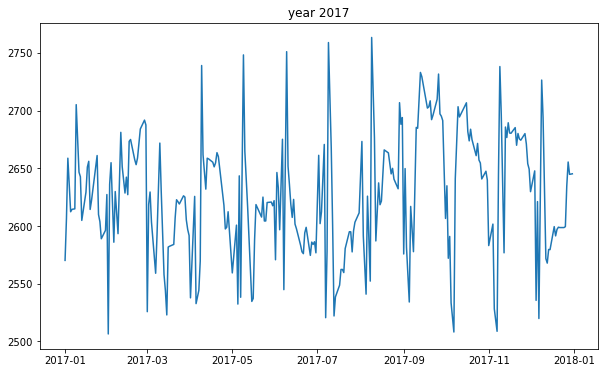

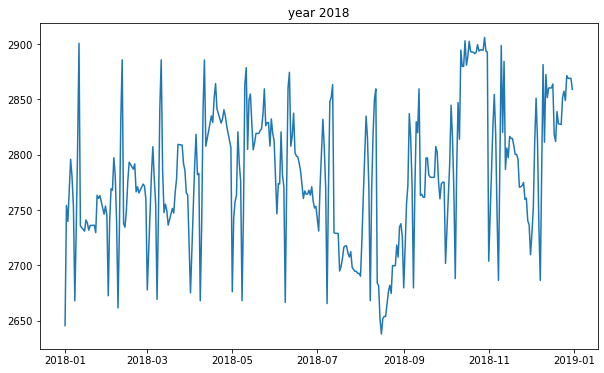

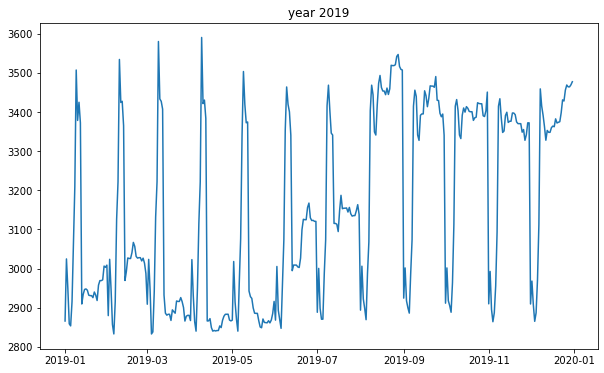

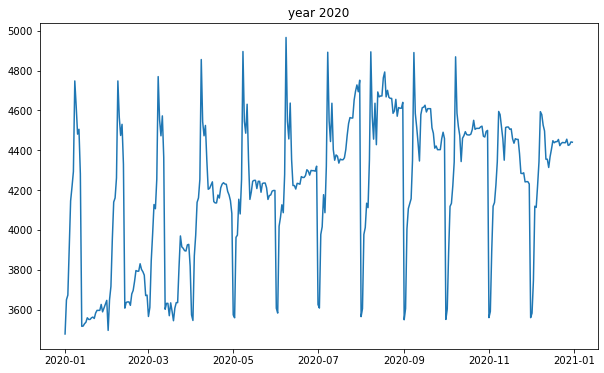

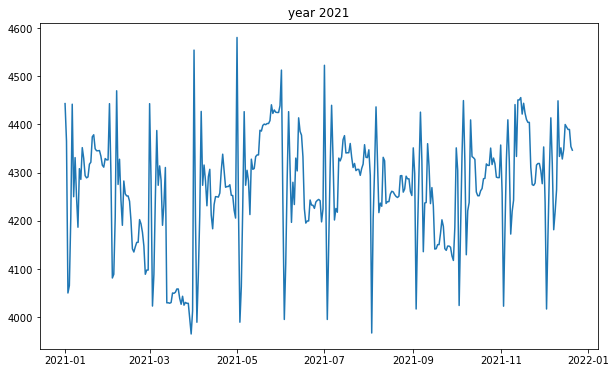

In [26]:
plt.figure(figsize=(10,6))
plt.plot(year_2017["date"],year_2017["price"])
plt.title("year 2017")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2018["date"],year_2018["price"])
plt.title("year 2018")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2019["date"],year_2019["price"])
plt.title("year 2019")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2020["date"],year_2020["price"])
plt.title("year 2020")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2021["date"],year_2021["price"])
plt.title("year 2021")
plt.show()

In [27]:
# fetching months:
gold["month"]=gold["date"].dt.month
gold.head(35)

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
5,2016-01-06,2617.700000,2016,1
6,2016-01-07,2903.800000,2016,1
7,2016-01-08,2887.800000,2016,1
8,2016-01-09,2813.800000,2016,1
9,2016-01-10,2786.800000,2016,1


In [28]:
gold

,date,price,year,month
0,2016-01-01,2252.60,2016,1
1,2016-01-02,2454.50,2016,1
2,2016-01-03,2708.10,2016,1
3,2016-01-04,2577.80,2016,1
4,2016-01-05,2597.75,2016,1
...,...,...,...,...
2177,2021-12-17,4394.40,2021,12
2178,2021-12-18,4389.50,2021,12
2179,2021-12-19,4389.50,2021,12
2180,2021-12-20,4354.10,2021,12


In [29]:
year_2016=gold[gold["year"]==2016]
year_2017=gold[gold["year"]==2017]
year_2018=gold[gold["year"]==2018]
year_2019=gold[gold["year"]==2019]
year_2020=gold[gold["year"]==2020]
year_2021=gold[gold["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year  month
 0 2016-01-01  2252.60  2016      1
 1 2016-01-02  2454.50  2016      1
 2 2016-01-03  2708.10  2016      1
 3 2016-01-04  2577.80  2016      1
 4 2016-01-05  2597.75  2016      1,
           date        price  year  month
 361 2016-12-27  2469.300000  2016     12
 362 2016-12-28  2484.300000  2016     12
 363 2016-12-29  2498.100000  2016     12
 364 2016-12-30  2497.800000  2016     12
 365 2016-12-31  2534.033333  2016     12)

In [30]:
year_2016

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
...,...,...,...,...
361,2016-12-27,2469.300000,2016,12
362,2016-12-28,2484.300000,2016,12
363,2016-12-29,2498.100000,2016,12
364,2016-12-30,2497.800000,2016,12


In [31]:
# group by price based on month:
# 2016
y_2016=year_2016.groupby(["month"]).agg({"price":np.mean})
y_2016


,price
month,
1,2495.832258
2,2688.703448
3,2682.854839
4,2677.790000
5,2677.650000
6,2745.596667
7,2779.582258
8,2792.240323
9,2792.705000


In [32]:
y_2016.reset_index(inplace=True)

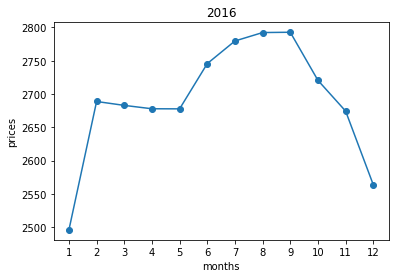

In [33]:
plt.scatter(y_2016["month"], y_2016["price"])
plt.plot(y_2016["month"], y_2016["price"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2016")
plt.xticks(y_2016["month"])
plt.show()

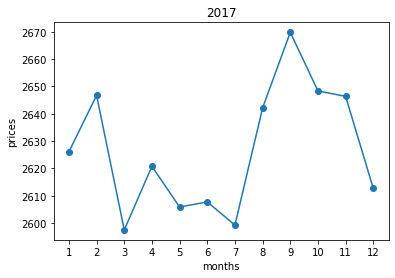

In [34]:
# 2017
y_2017=year_2017.groupby(["month"]).agg({"price":np.mean})
y_2017.reset_index(inplace=True)
plt.scatter(y_2017["month"], y_2017["price"])
plt.plot(y_2017["month"], y_2017["price"])
plt.xticks(y_2017["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2017")
plt.show()

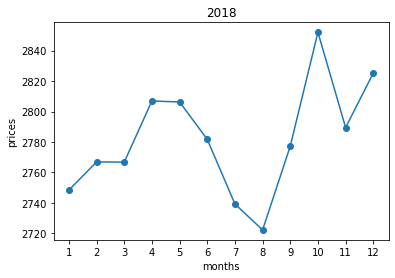

In [35]:
# 2018:
y_2018=year_2018.groupby(["month"]).agg({"price":np.mean})
y_2018.reset_index(inplace=True)
plt.scatter(y_2018["month"], y_2018["price"])
plt.plot(y_2018["month"], y_2018["price"])
plt.xticks(y_2018["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2018")
plt.show()

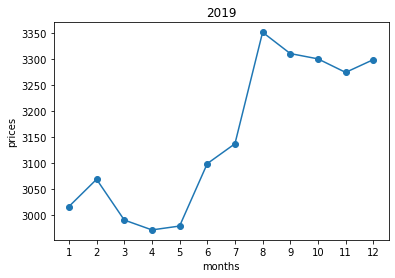

In [36]:
# 2019:
y_2019=year_2019.groupby(["month"]).agg({"price":np.mean})
y_2019.reset_index(inplace=True)
plt.scatter(y_2019["month"], y_2019["price"])
plt.plot(y_2019["month"], y_2019["price"])
plt.xticks(y_2019["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2019")
plt.show()

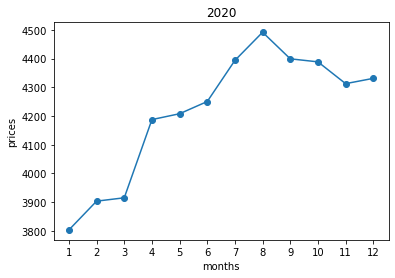

In [37]:
# 2020:
y_2020=year_2020.groupby(["month"]).agg({"price":np.mean})
y_2020.reset_index(inplace=True)
plt.scatter(y_2020["month"], y_2020["price"])
plt.plot(y_2020["month"], y_2020["price"])
plt.xticks(y_2020["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2020")
plt.show()

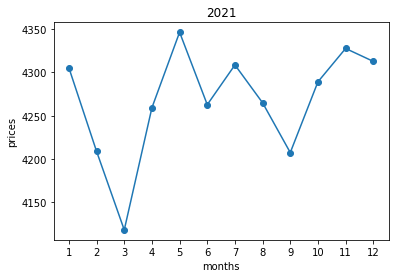

In [38]:
# 2021:y_2021.reset_index(inplace=True)
y_2021=year_2021.groupby(["month"]).agg({"price":np.mean})
y_2021.reset_index(inplace=True)
plt.scatter(y_2021["month"], y_2021["price"])
plt.plot(y_2021["month"], y_2021["price"])
plt.xticks(y_2021["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2021")
plt.show()

In [39]:
# newly added end.

In [40]:
df['price_sqrt'] = (df['price'])**(1/2)
df['price_log'] = log(df['price'])

In [41]:
df

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,1,47.461563,7.719840
1,2016-01-02,2454.50,2016,1,49.542911,7.805678
2,2016-01-03,2708.10,2016,1,52.039408,7.904003
3,2016-01-04,2577.80,2016,1,50.772040,7.854692
4,2016-01-05,2597.75,2016,1,50.968127,7.862401
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,66.290271,8.388086
2178,2021-12-18,4389.50,2021,12,66.253302,8.386971
2179,2021-12-19,4389.50,2021,12,66.253302,8.386971
2180,2021-12-20,4354.10,2021,12,65.985604,8.378873


<AxesSubplot:xlabel='date'>

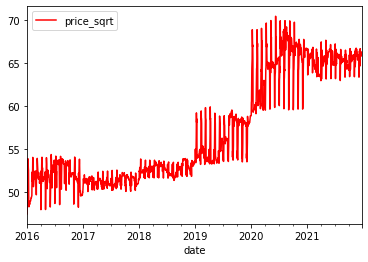

In [42]:
df.plot(x = 'date',y = 'price_sqrt',color = 'red')

<AxesSubplot:xlabel='date', ylabel='price_sqrt'>

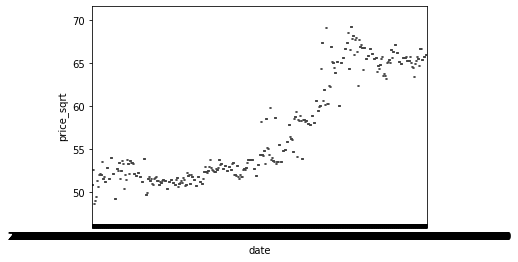

In [43]:
sns.boxplot(df.date,df.price_sqrt)

In [44]:
import numpy as np
DF=df.groupby(pd.DatetimeIndex(df["date"]).year).agg(np.mean)
DF

,price,year,month,price_sqrt,price_log
date,,,,,
2016,2690.614162,2016.0,6.513661,51.851549,7.896004
2017,2626.676484,2017.0,6.526027,51.248738,7.873289
2018,2781.938082,2018.0,6.526027,52.740980,7.930668
2019,3150.210685,2019.0,6.526027,56.087347,8.052419
2020,4216.378689,2020.0,6.513661,64.872209,8.342907
2021,4266.871549,2021.0,6.371831,65.315450,8.358277


In [45]:
DF.reset_index(inplace=True)

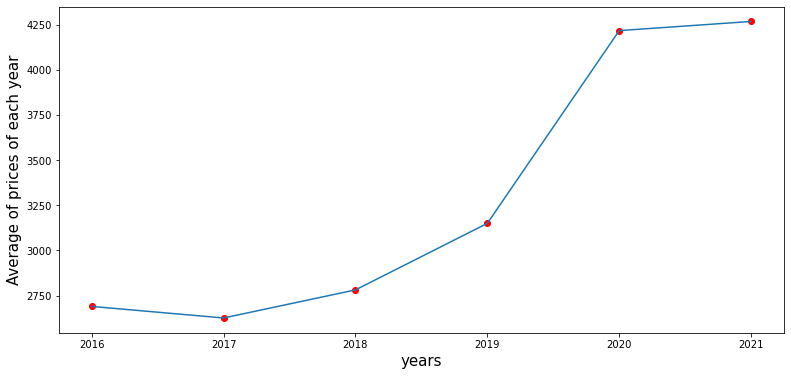

In [46]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(DF.date,DF.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each year")
plt.scatter(DF.date,DF.price,c='red')

In [47]:
import numpy as np
kf=df.groupby(pd.DatetimeIndex(df["date"]).month).agg(np.mean)
kf

,price,year,month,price_sqrt,price_log
date,,,,,
1,3165.796326,2018.500000,1.0,55.950626,8.038082
2,3214.831471,2018.494118,2.0,56.434510,8.057091
3,3178.425000,2018.500000,3.0,56.114496,8.045743
4,3253.865833,2018.500000,4.0,56.720211,8.065266
5,3270.410753,2018.500000,5.0,56.843587,8.068920
6,3291.177500,2018.500000,6.0,57.047911,8.076857
7,3326.265054,2018.500000,7.0,57.316817,8.085108
8,3377.567473,2018.500000,8.0,57.756848,8.100308
9,3359.573889,2018.500000,9.0,57.645105,8.097890


In [48]:
kf.reset_index(inplace=True)

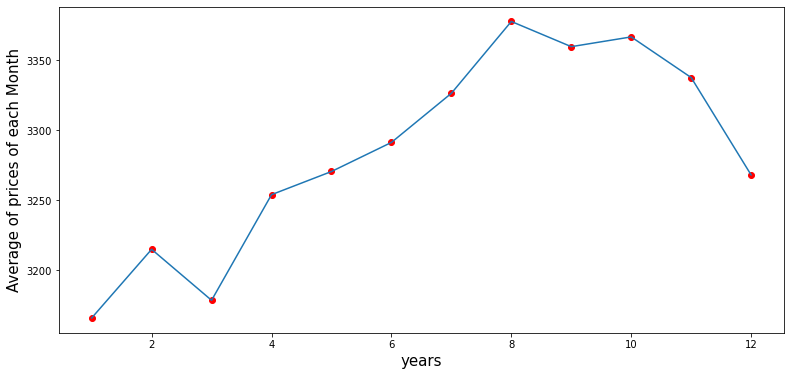

In [49]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(kf.date,kf.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each Month")
plt.scatter(kf.date,kf.price,c='red')

In [50]:
df["month"] = df.date.dt.strftime("%b") # month extraction
df["year"] = df.date.dt.strftime("%Y") # month extraction

In [51]:
df

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec,66.290271,8.388086
2178,2021-12-18,4389.50,2021,Dec,66.253302,8.386971
2179,2021-12-19,4389.50,2021,Dec,66.253302,8.386971
2180,2021-12-20,4354.10,2021,Dec,65.985604,8.378873


In [52]:
months = pd.get_dummies(df['month']) 
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,1,0,0,0,0,0,0,0,0,0
2178,0,0,1,0,0,0,0,0,0,0,0,0
2179,0,0,1,0,0,0,0,0,0,0,0,0
2180,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [54]:
Data = pd.concat([df,months],axis=1) 

In [55]:
Data.head()

,date,price,year,month,price_sqrt,price_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='month', ylabel='year'>

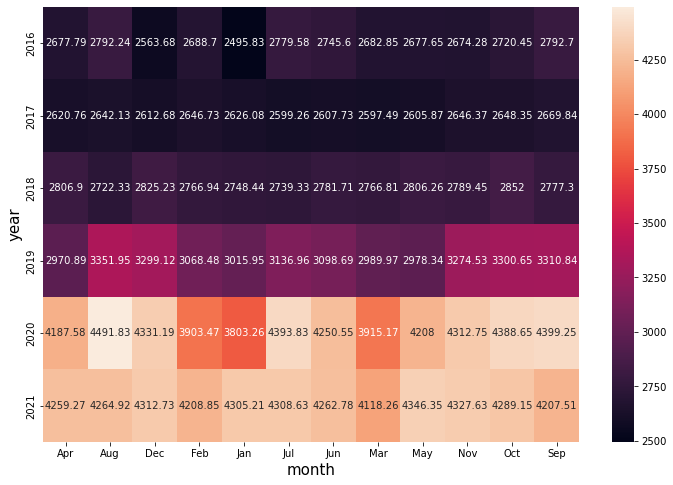

In [56]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Data,values="price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='price'>

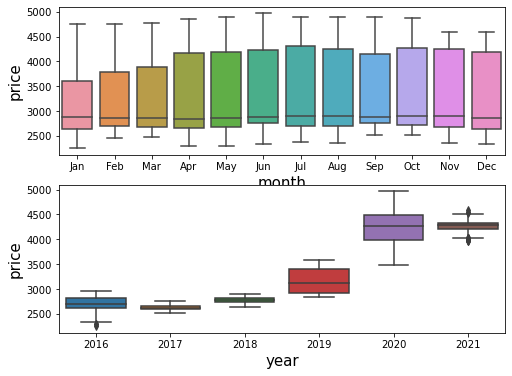

In [57]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="price",data= Data)
plt.subplot(212)
sns.boxplot(x="year",y="price",data=Data)

<AxesSubplot:xlabel='year', ylabel='price'>

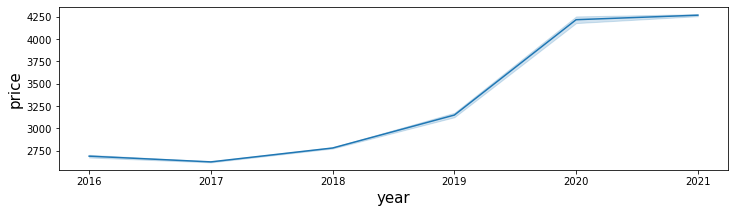

In [58]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="price",data=Data)

In [59]:
#dont refer end..

# moving average:


In [60]:
Data.head()

,date,price,year,month,price_sqrt,price_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,1,0,0,0,0,0,0,0,0,0,0,0


In [61]:
data1=Data[["date","year","month","price","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]].copy()
data1.head(1)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,Jan,2252.6,1,0,0,0,0,0,0,0,0,0,0,0


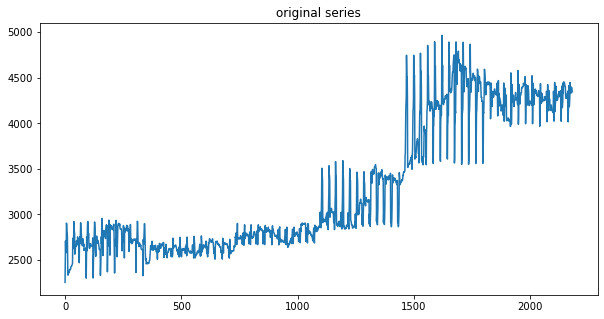

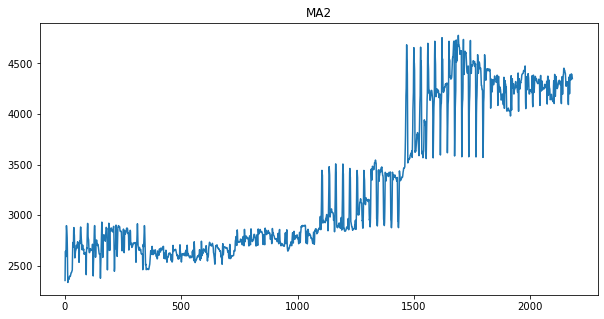

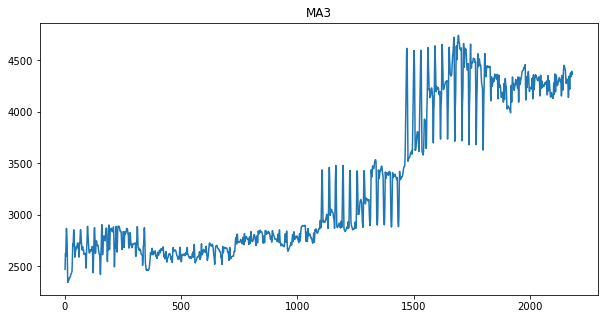

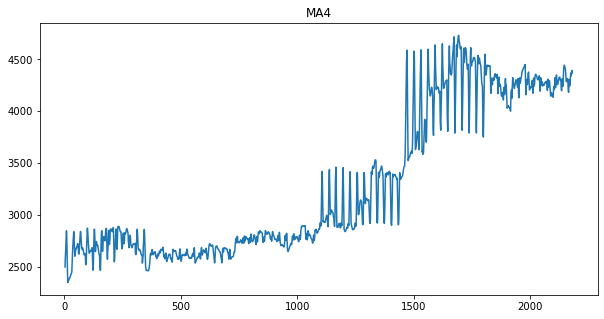

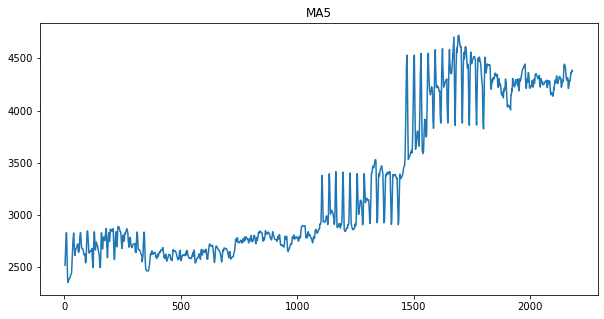

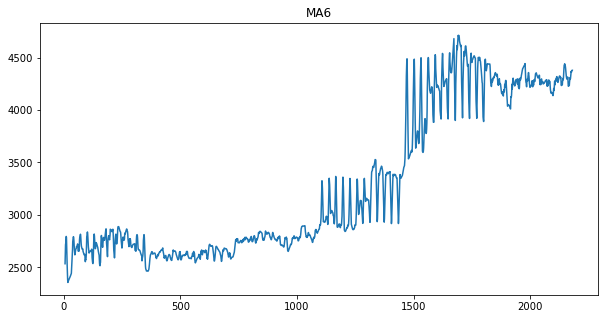

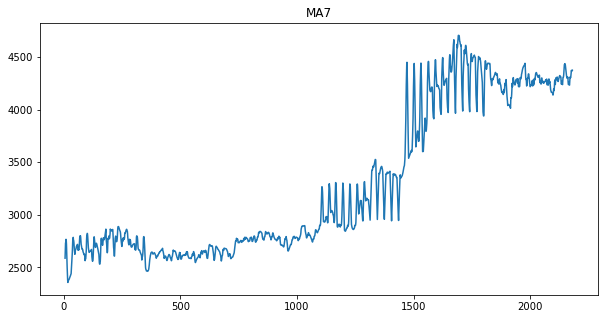

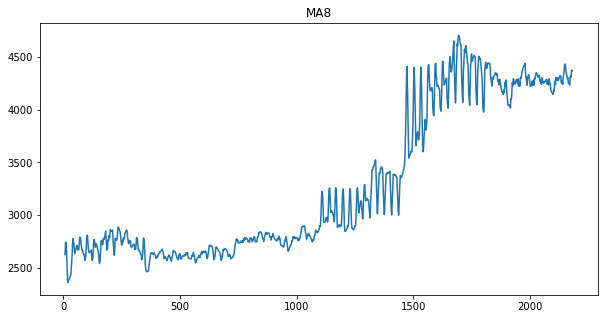

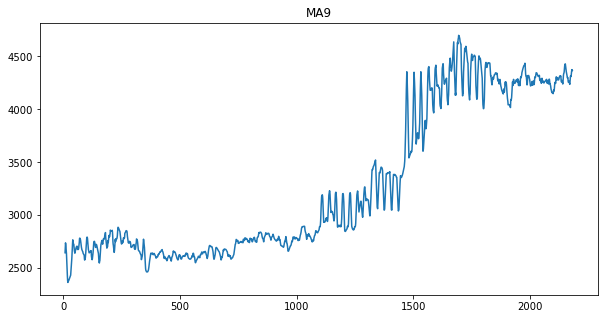

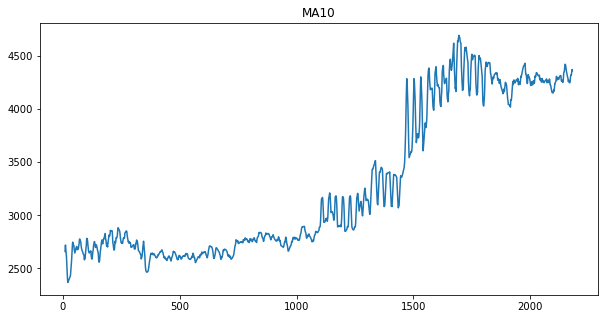

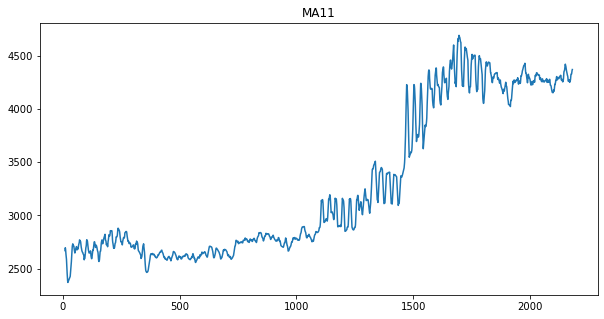

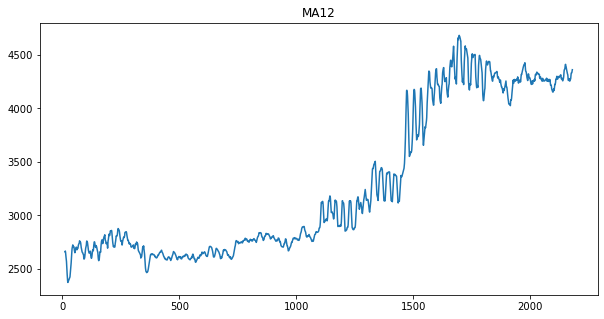

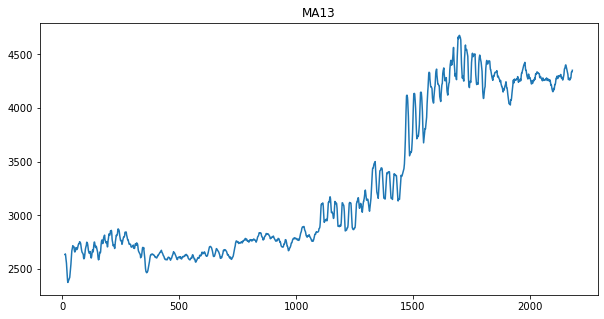

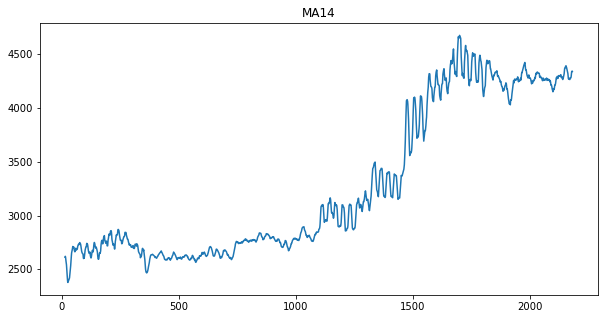

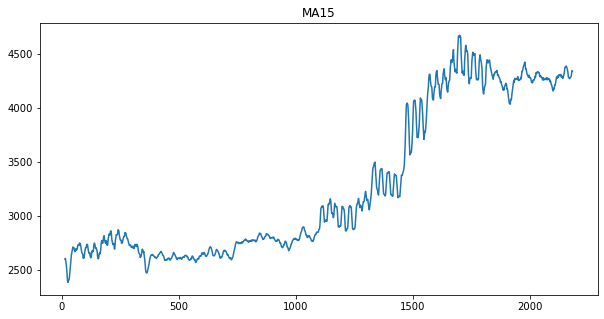

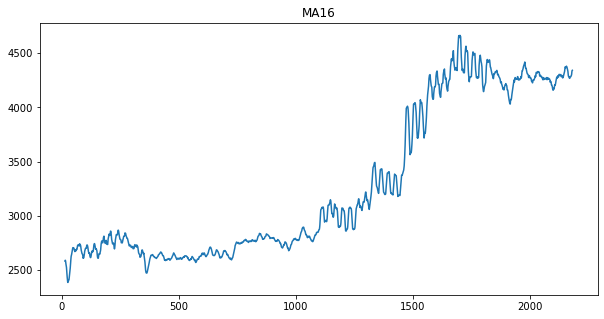

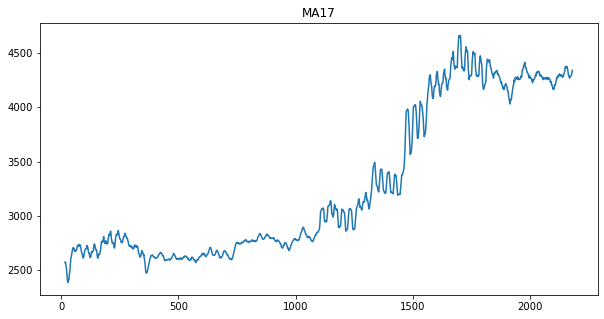

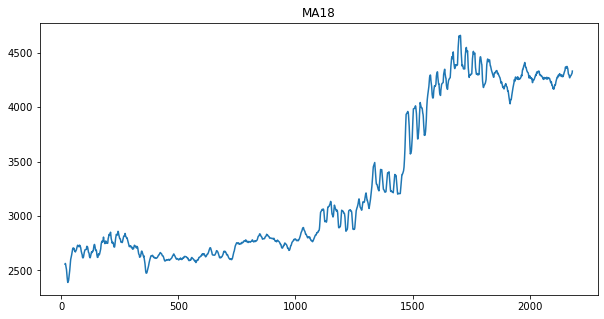

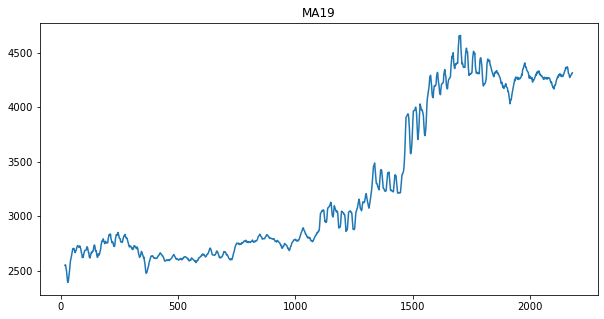

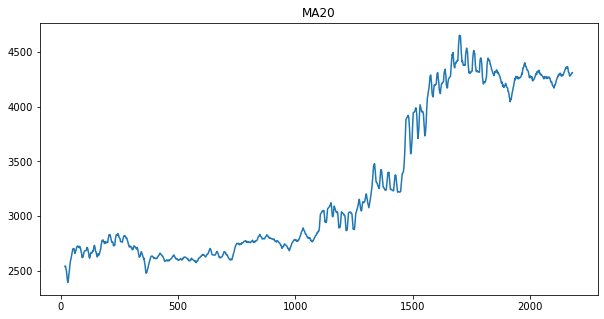

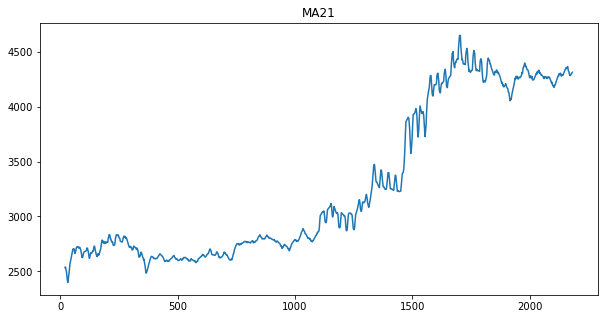

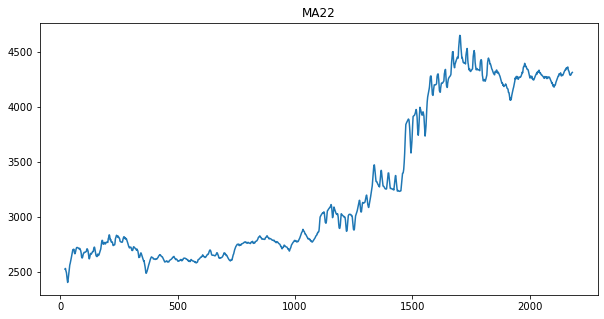

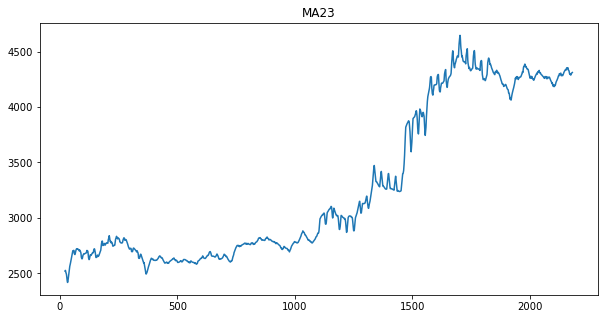

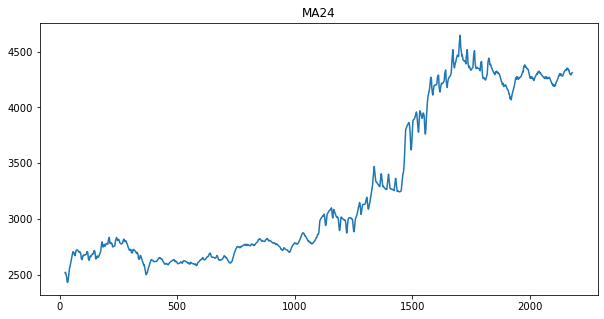

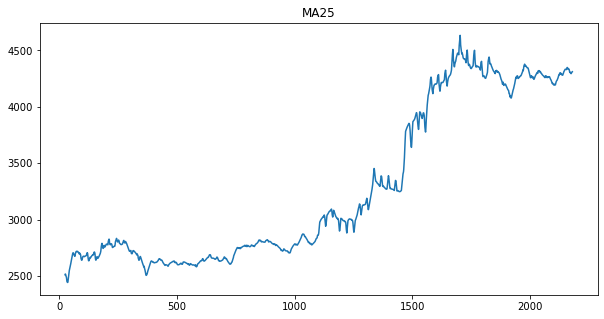

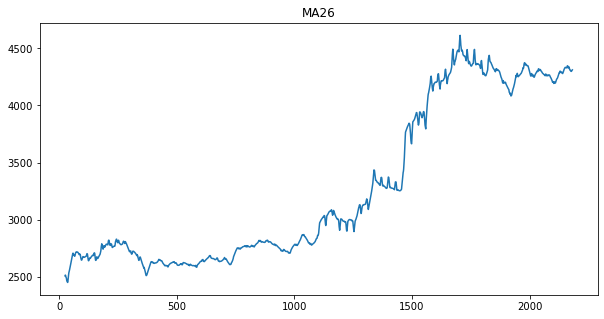

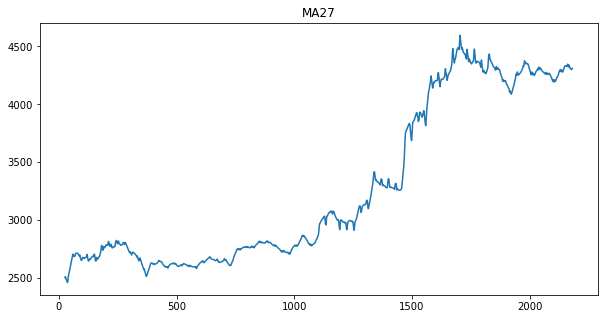

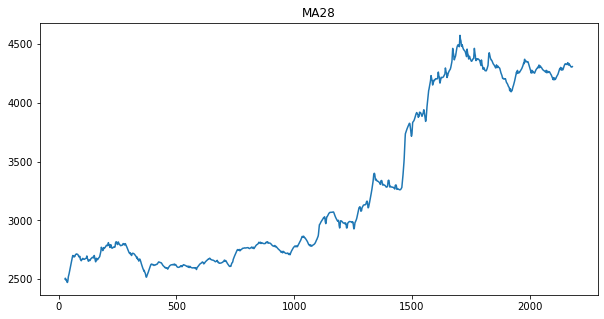

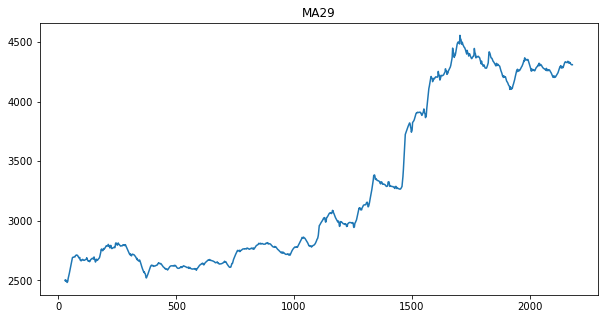

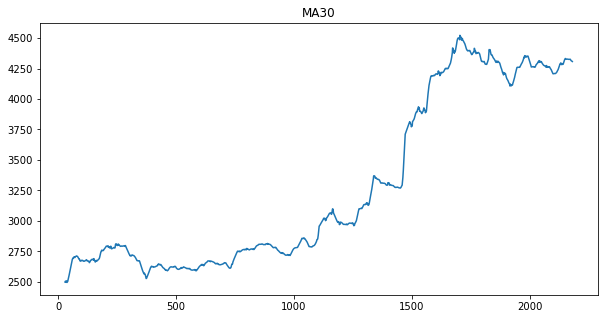

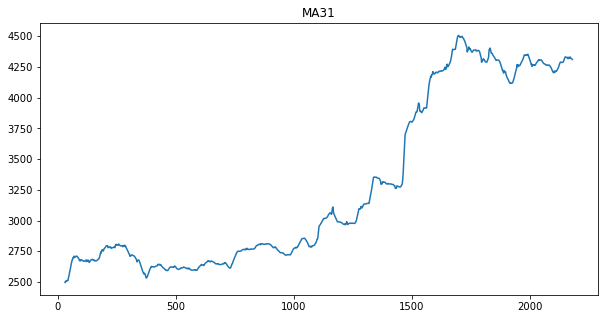

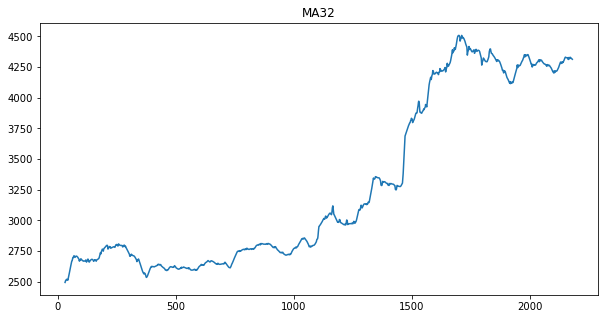

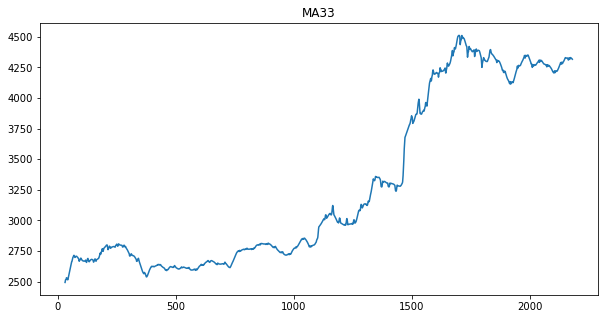

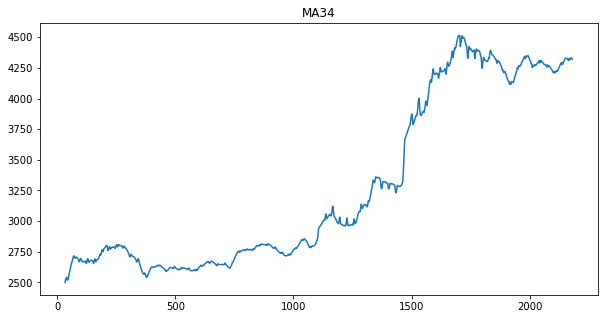

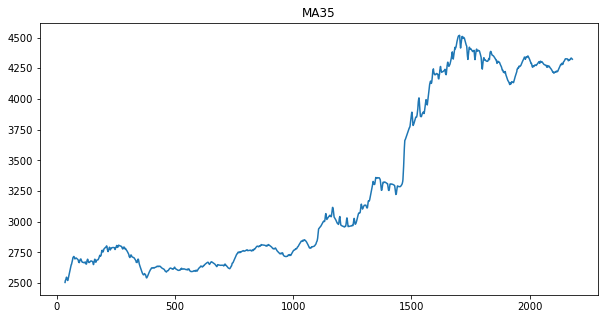

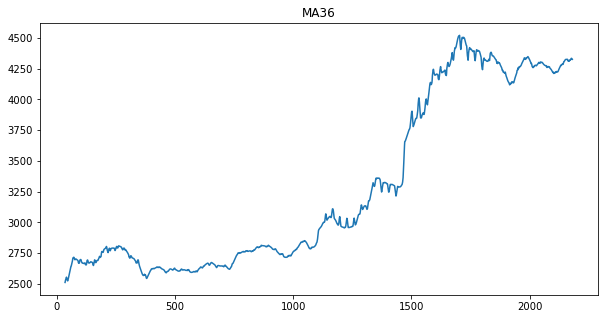

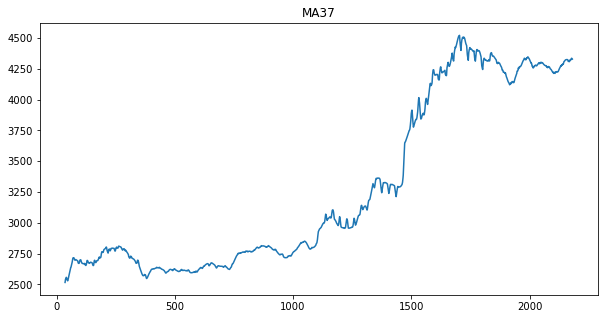

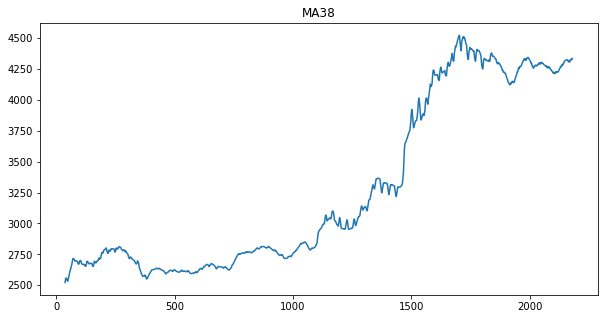

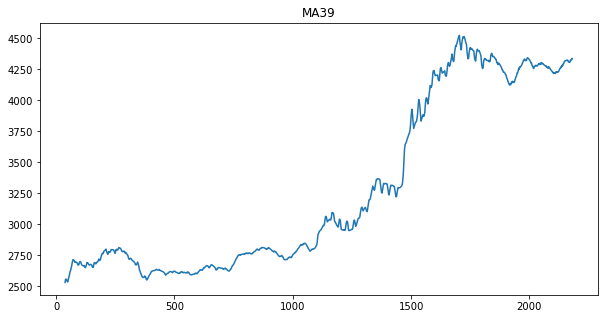

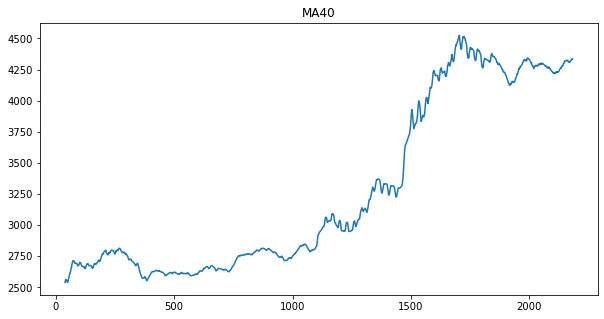

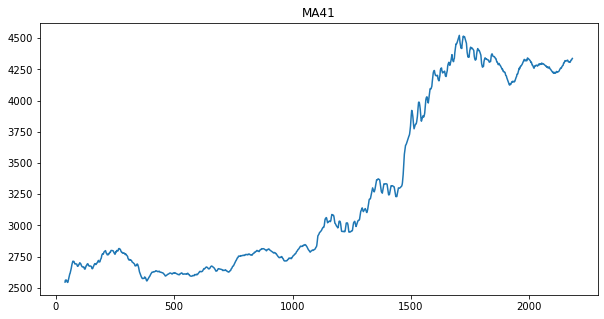

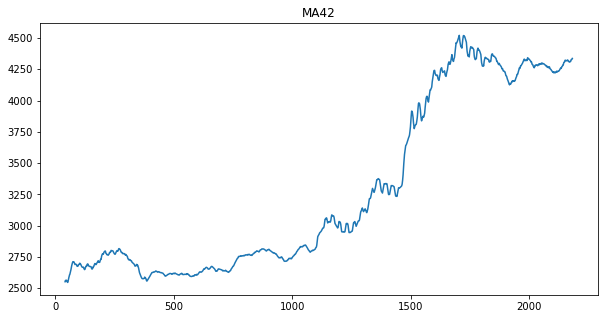

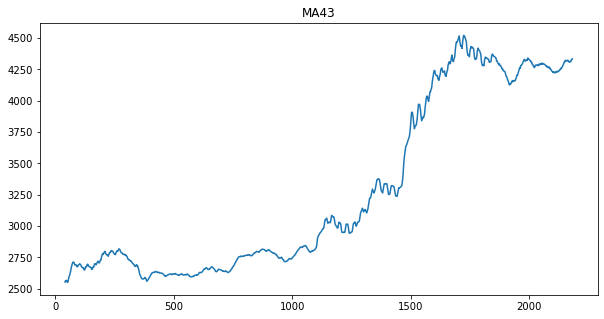

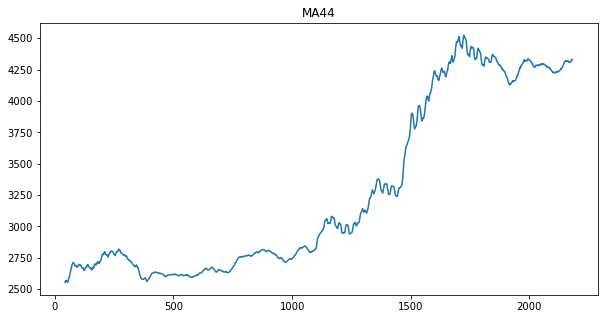

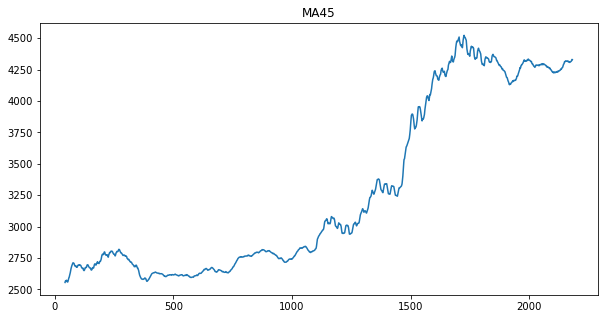

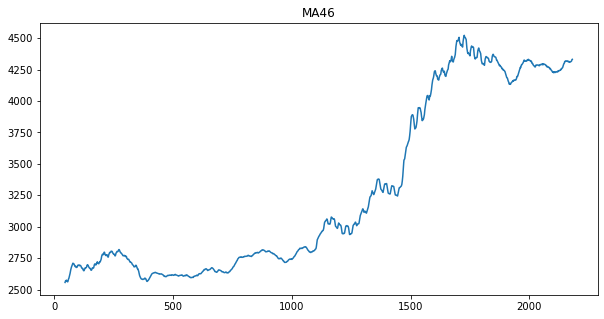

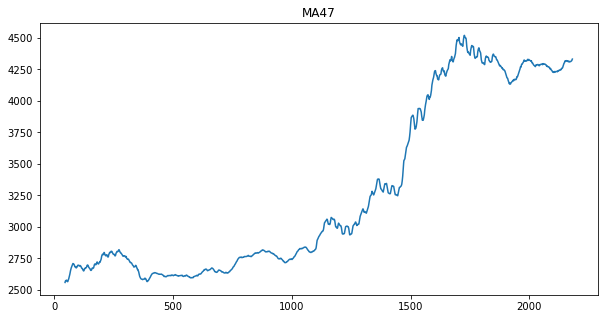

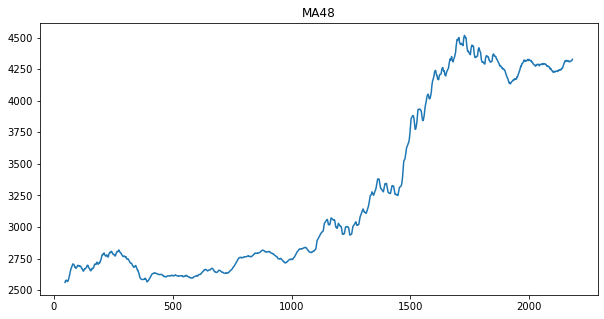

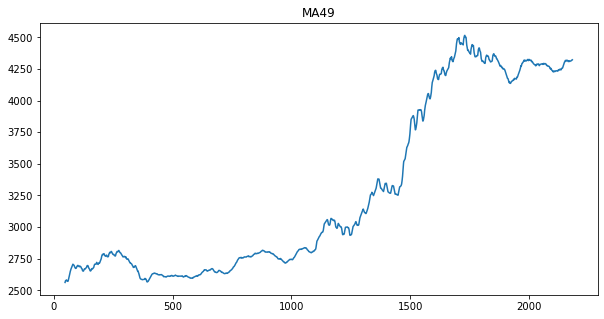

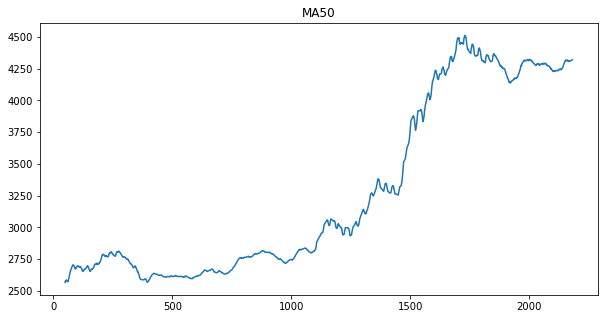

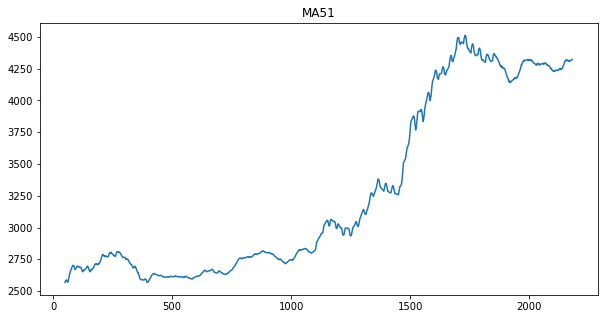

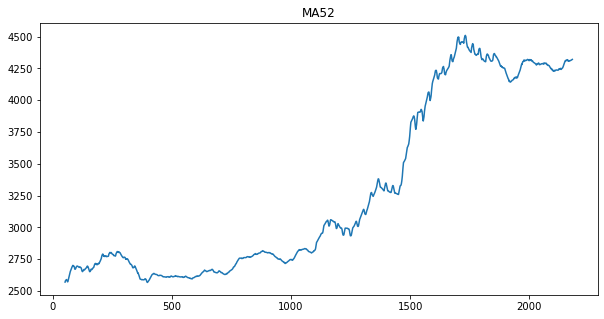

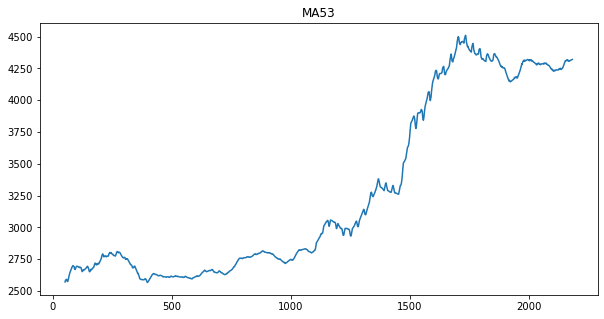

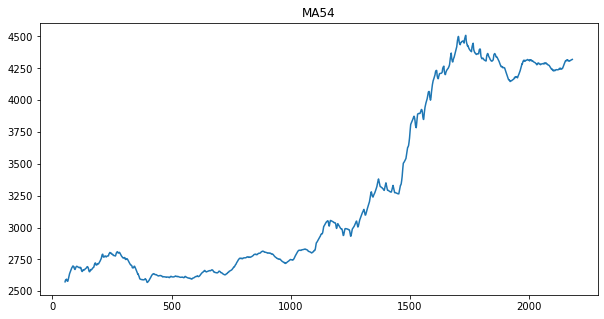

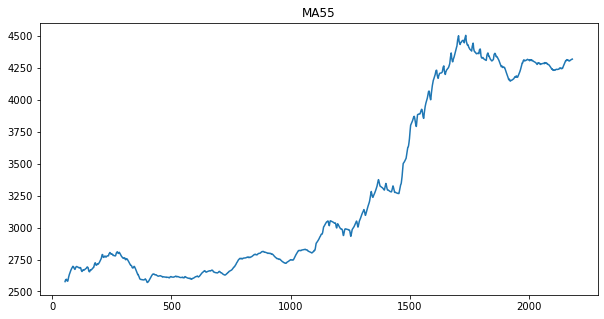

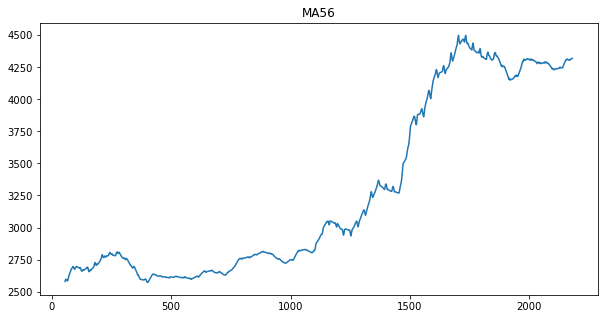

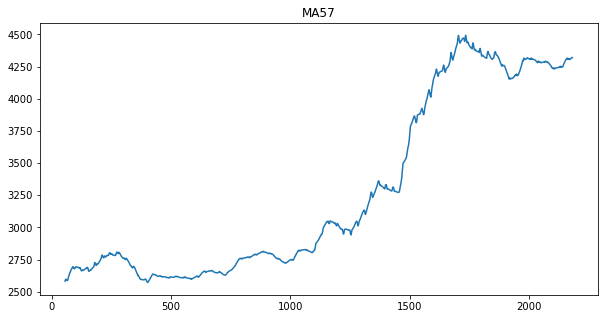

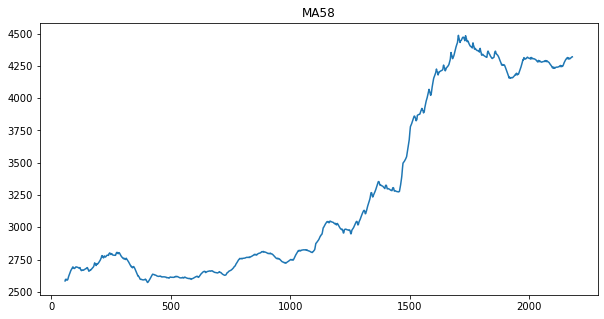

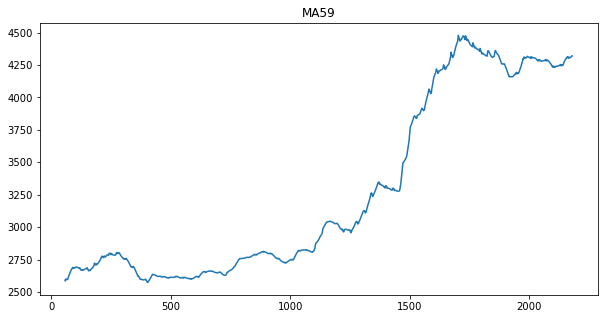

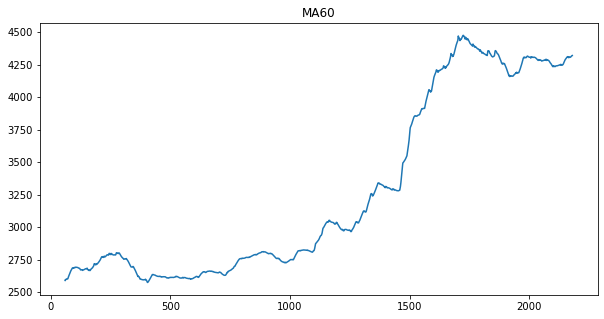

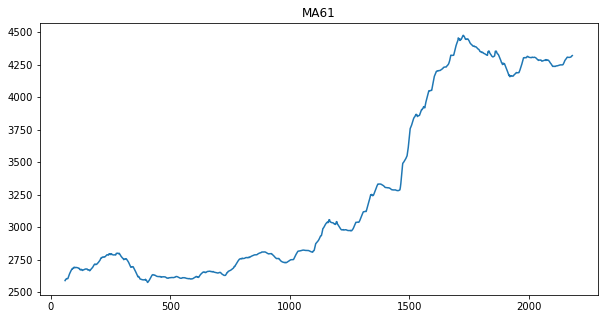

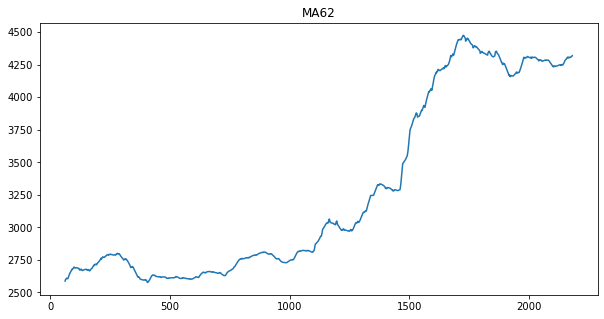

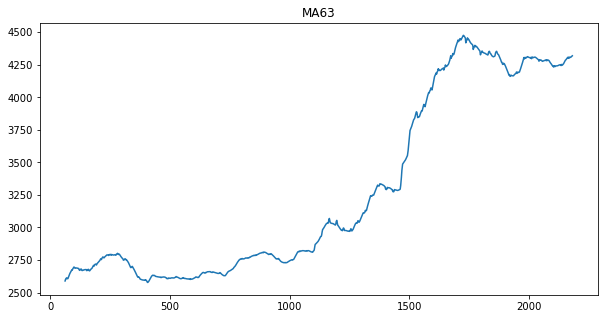

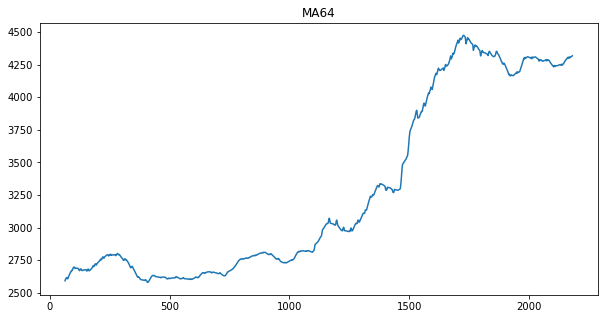

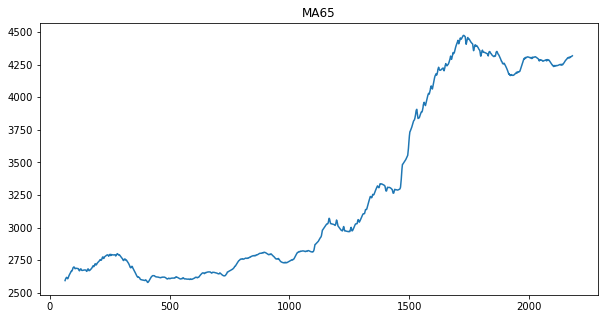

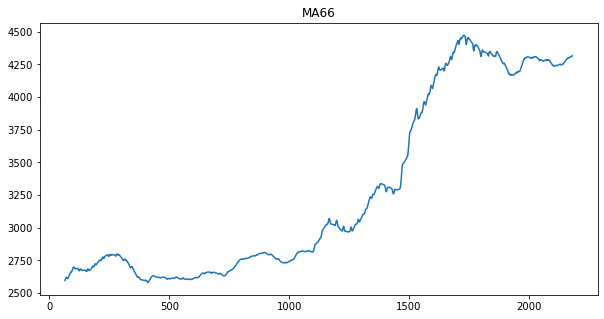

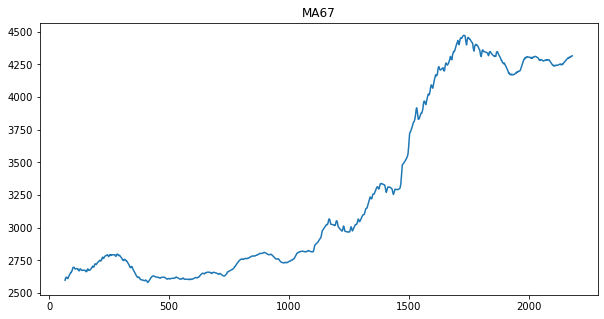

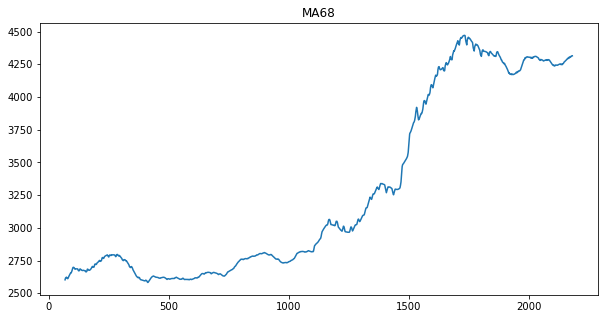

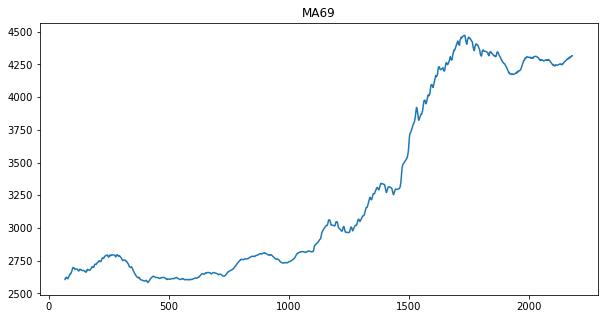

In [62]:
plt.figure(figsize=(10,5))
plt.plot(Data["price"])
plt.title("original series")
plt.show()

for i in range(2,70):
    plt.figure(figsize=(10,5)) 
    plt.plot(data1["price"].rolling(i).mean())
    plt.title("MA" + str(i))
    plt.show()
    

# we are getting a smooth line at MA 31

# time series decomposition plot:


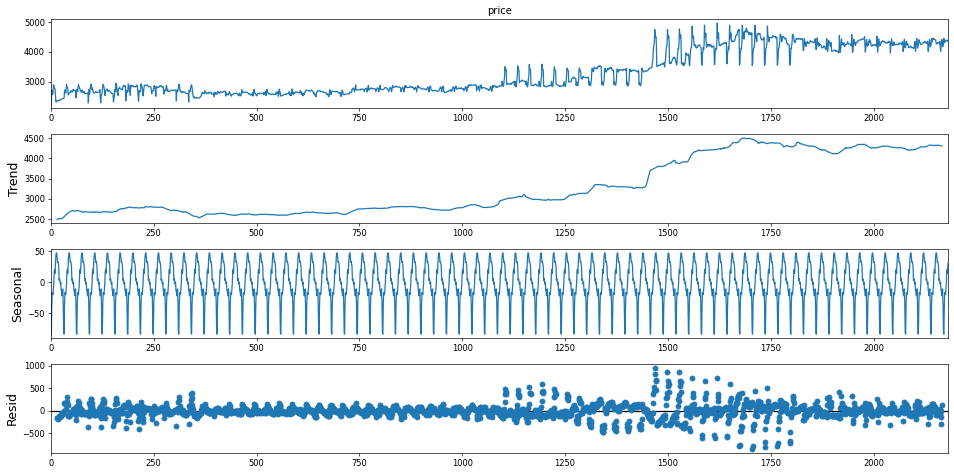

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
#plt.figure(figsize=(15,6))
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':60})
decompose = seasonal_decompose(data1["price"],period=31)
decompose.plot()
plt.show()


# note:
# figure.dpi means:
# Resolution in dots per inch
 # The dpi method of figure module of matplotlib library is the resolution in dots per inch

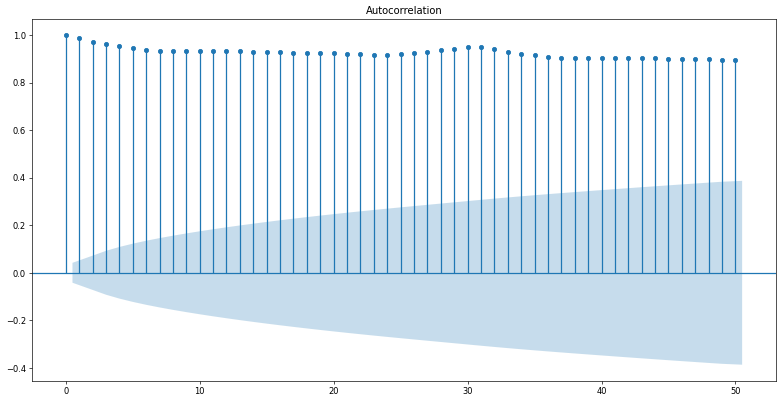

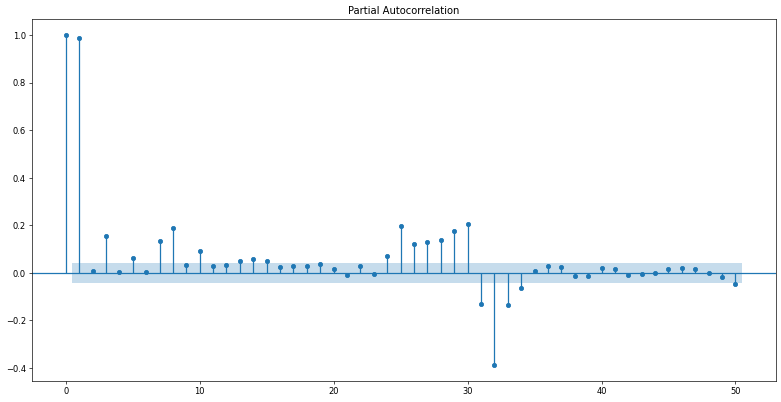

In [64]:
# ACF and PACF plots:
d = pd.read_csv("Gold_data.csv")
d.set_index("date",inplace=True)  # for acf,pacf date should be set as index
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(d,lags=50)
tsa_plots.plot_pacf(d,lags=50)
plt.show()


# model building:

## 1. Holt Winter:

# splitting data:

In [3]:
df11 = pd.read_csv("Gold_data.csv")
df11

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [4]:
df11.head(5)

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [5]:
df11.dtypes

date      object
price    float64
dtype: object

In [290]:
train=df11.head(2000)
test=df11.tail(182)

In [291]:
train.head(3)

,date,price
0,2016-01-01,2252.6
1,2016-01-02,2454.5
2,2016-01-03,2708.1


In [292]:
train.dtypes

date      object
price    float64
dtype: object

In [293]:
test.head(3)

,date,price
2000,2021-06-23,4232.3
2001,2021-06-24,4225.8
2002,2021-06-25,4238.9


In [294]:
len(test)

182

## 1. Holts winter exponential smoothing with additive seasonality and additive trend¶

In [295]:
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [296]:
holt = ExponentialSmoothing(train["price"],seasonal="add",trend="add",seasonal_periods=31).fit()

In [297]:
# predicting:

In [298]:
pred_holt = holt.forecast(182).round(2)
pred_holt

2000    4205.45
2001    4195.16
2002    4208.22
2003    4201.78
2004    4215.20
         ...   
2177    5179.71
2178    5222.58
2179    5234.65
2180    5209.68
2181    5190.42
Length: 182, dtype: float64

In [299]:
pred_holt.head(5)

2000    4205.45
2001    4195.16
2002    4208.22
2003    4201.78
2004    4215.20
dtype: float64

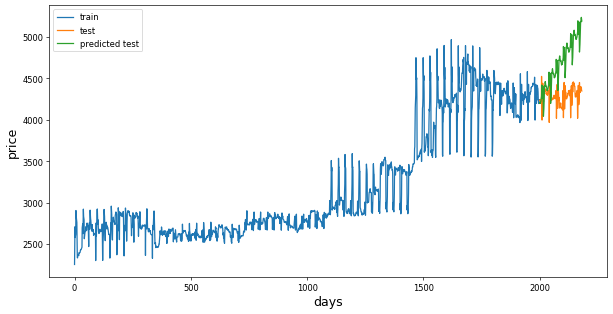

In [300]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

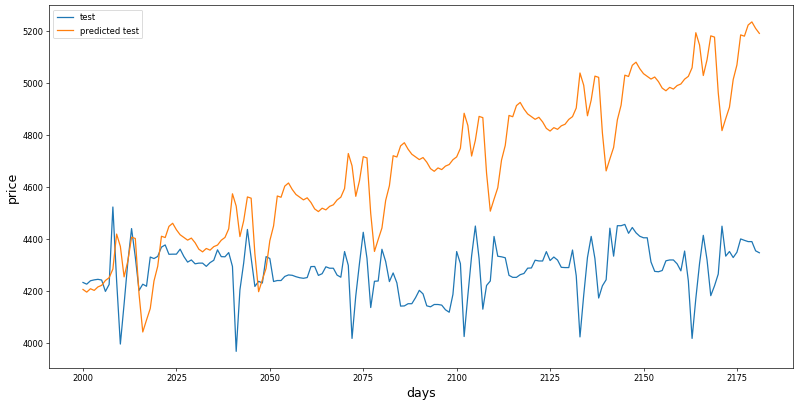

In [301]:
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## model evaluation:

In [302]:
#rmse:

In [303]:
from sklearn.metrics import mean_squared_error as mse

In [304]:
error=mse(test["price"],pred_holt)
error

238089.6411516483

In [305]:
rmse=np.sqrt(error)
rmse

487.9443012800214

In [306]:
df.head(5)

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401


In [307]:
df["price"].mean(),np.sqrt(df["price"].var())

# note: we got error as 487 which is highly within one standard deviation away from the Mean

(3284.4500458295115, 719.5644343413472)

In [308]:
##Evaluation Metric MAPE
def MAPE(org,pred):
    temp = np.abs((org-pred)/org)*100
    return np.mean(temp)

In [309]:
MAPE(test["price"],pred_holt)

9.592720822975055

## 2. Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [310]:
holt = ExponentialSmoothing(train["price"],seasonal="mul",trend="mul",seasonal_periods=31).fit()

In [311]:
#predicting:

In [312]:
pred_holt = holt.forecast(182).round(2)
pred_holt

2000    4220.29
2001    4223.51
2002    4251.30
2003    4257.85
2004    4282.88
         ...   
2177    6189.79
2178    6240.20
2179    6254.49
2180    6211.71
2181    6172.50
Length: 182, dtype: float64

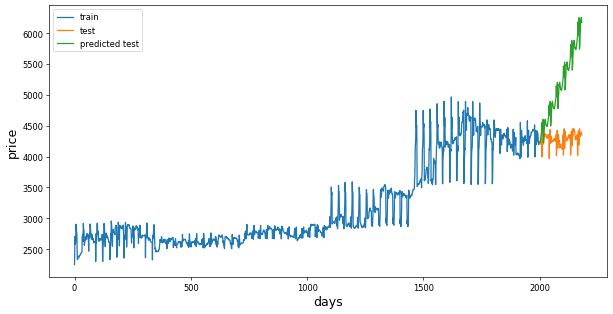

In [313]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

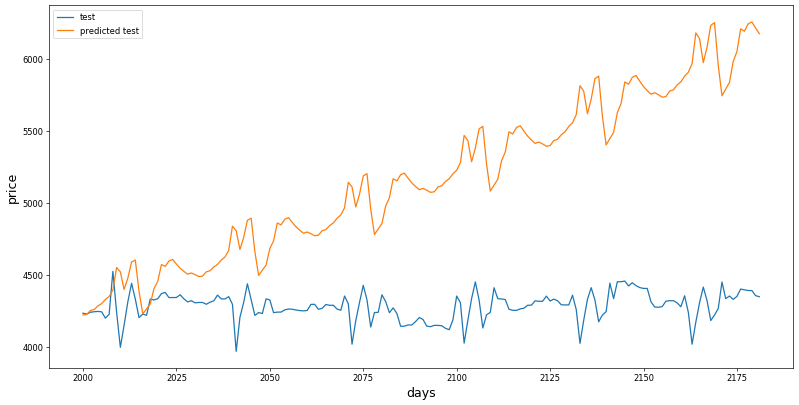

In [314]:
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## model evaluation

In [315]:
#rmse:

In [316]:
from sklearn.metrics import mean_squared_error as mse

In [317]:
error=mse(test["price"],pred_holt)
error

1080976.5549769232

In [318]:
rmse=np.sqrt(error)
rmse

1039.7002236110768

In [319]:
df["price"].mean(),np.sqrt(df["price"].var())

(3284.4500458295115, 719.5644343413472)

In [320]:
# lies within 2 std away from mean

In [321]:
MAPE(test["price"],pred_holt)

20.743602417341734

## 3. Holts winter exponential smoothing with additive seasonality and multiplicative trend

In [322]:
holt = ExponentialSmoothing(train["price"],seasonal="add",trend="mul",seasonal_periods=31).fit()

In [323]:
#predicting:

In [324]:
pred_holt = holt.forecast(182).round(2)
pred_holt

2000    4222.49
2001    4224.88
2002    4249.61
2003    4255.80
2004    4281.82
         ...   
2177    6343.71
2178    6391.78
2179    6405.16
2180    6382.86
2181    6371.96
Length: 182, dtype: float64

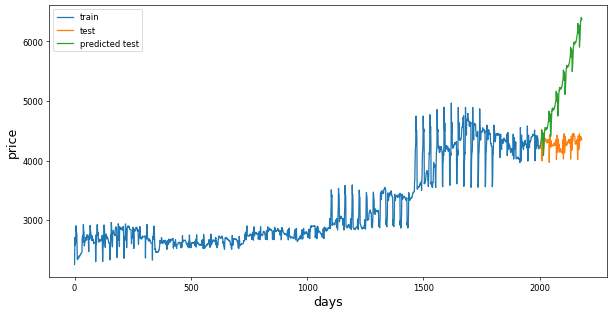

In [325]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

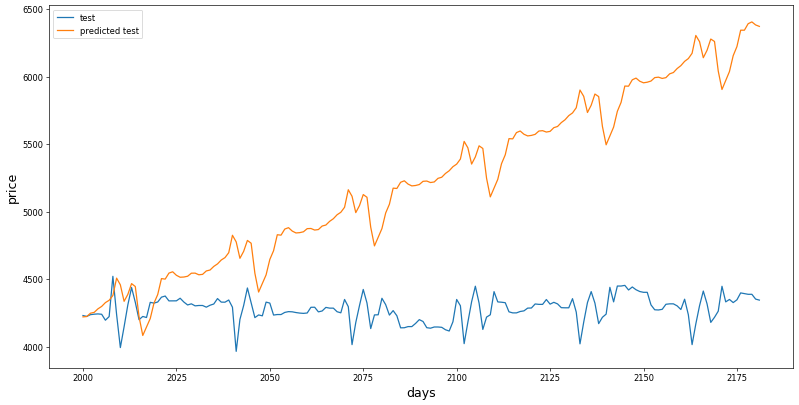

In [326]:
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## model evaluation

In [327]:
#rmse:

In [328]:
error=mse(test["price"],pred_holt)
error

1275078.1078708791

In [329]:
rmse=np.sqrt(error)
rmse

1129.1935652804966

In [330]:
df["price"].mean(),np.sqrt(df["price"].var())

(3284.4500458295115, 719.5644343413472)

In [331]:
# lies within 2 std away from mean

In [332]:
MAPE(test["price"],pred_holt)

22.279853240517653

## model 4. Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [333]:
holt = ExponentialSmoothing(train["price"],seasonal="mul",trend="add",seasonal_periods=31).fit()

In [334]:
# predicting:
pred_holt = holt.forecast(182).round(2)
pred_holt

2000    4202.87
2001    4187.11
2002    4191.98
2003    4172.72
2004    4169.49
         ...   
2177    5004.56
2178    5068.77
2179    5101.26
2180    5084.28
2181    5066.13
Length: 182, dtype: float64

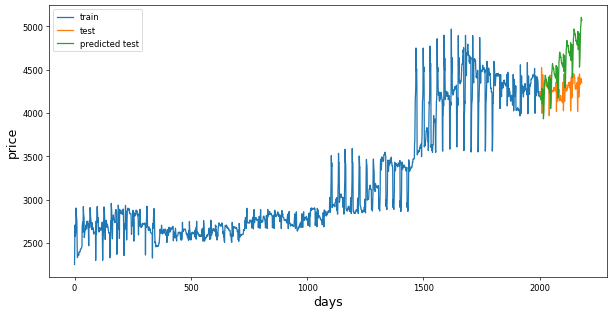

In [335]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

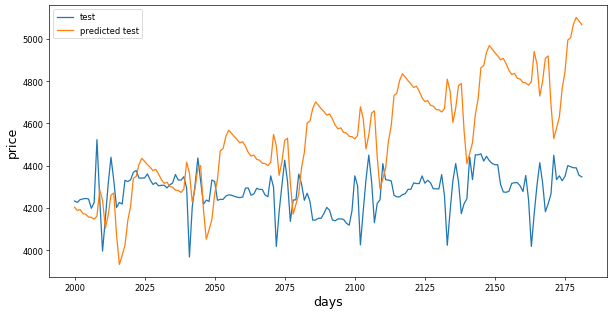

In [336]:
test["price"].plot(legend=True, label="test",figsize=(12,6))
#plt.scatter(np.arange(1,len(actual)+1),actual["price"],c="r")

pred_holt.plot(legend=True,label="predicted test")
#plt.scatter(np.arange(1,len(actual)+1),actual["price"],c="b")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## model evaluation

In [337]:
#rmse:

In [338]:
error=mse(test["price"],pred_holt)
error

132775.53990824177

In [339]:
rmse=np.sqrt(error)
rmse

364.38378107188277

In [340]:
df["price"].mean(),np.sqrt(df["price"].var())

(3284.4500458295115, 719.5644343413472)

In [341]:
# lies within 1 standard deviation away from mean, this model gave the minimum rmse compared to others.

In [342]:
# MAPE:
MAPE(test["price"],pred_holt)

6.998679455263859

#### model building:

In [343]:
holt = ExponentialSmoothing(df11["price"],seasonal="mul",trend="add",seasonal_periods=31).fit()
# predicting:
pred_holt = holt.forecast(30).round(2)
pred_holt

2182    4371.84
2183    4346.55
2184    4340.78
2185    4338.62
2186    4339.99
2187    4325.18
2188    4308.61
2189    4295.92
2190    4274.69
2191    4264.14
2192    4290.33
2193    4271.08
2194    4210.17
2195    4218.19
2196    4263.70
2197    4339.40
2198    4347.25
2199    4313.80
2200    4288.13
2201    4278.64
2202    4285.52
2203    4222.71
2204    4172.62
2205    4177.72
2206    4186.23
2207    4235.65
2208    4277.77
2209    4339.17
2210    4396.51
2211    4434.11
dtype: float64

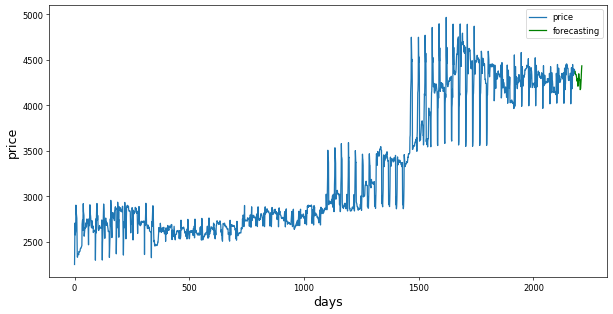

In [344]:
df11["price"].plot(legend=True, label="price",figsize=(12,6))
pred_holt.plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

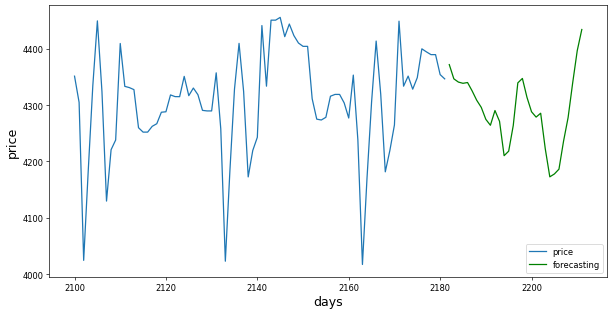

In [345]:
df11["price"][2100:].plot(legend=True, label="price",figsize=(12,6))
pred_holt.plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## tuning:

In [346]:
#obtaining best number for seasonal periods
import warnings
warnings.filterwarnings("ignore")
lis=[]
for i in range(2,100):
    holt = ExponentialSmoothing(train["price"],seasonal="mul",trend="add",seasonal_periods=i).fit()
    pred_holt = holt.forecast(182).round(2)
    lis.append(MAPE(test["price"],pred_holt) )
    

In [347]:
#lis

In [348]:
lis[84]
# indexing starts from 0, therefore it is 85, period started from 2, therefore it is 86

2.1671245700107558

In [349]:
len(lis)

98

In [350]:
np.arange(2,len(lis)+2)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

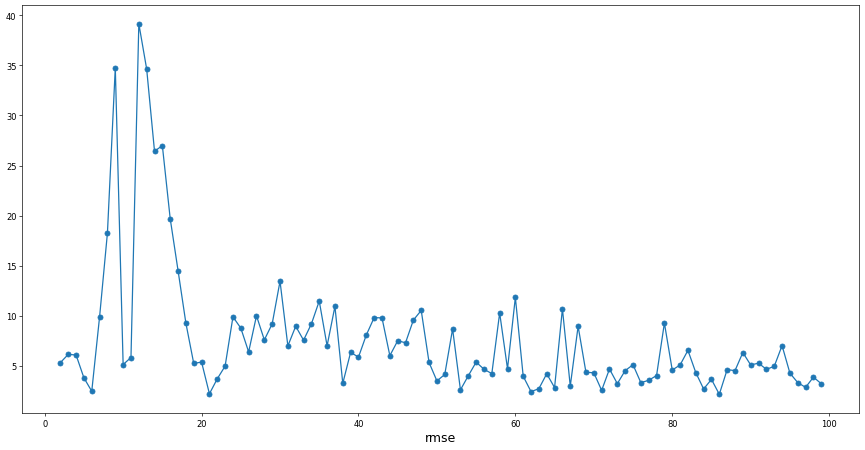

In [351]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
plt.scatter(np.arange(2,len(lis)+2),lis)
plt.plot(np.arange(2,len(lis)+2),lis)
plt.xlabel("rmse")
plt.show()

In [352]:
#period is 86

## building model 4 again


In [353]:
holt = ExponentialSmoothing(train["price"],seasonal="mul",trend="add",seasonal_periods=86).fit()

In [354]:
# predicting:
pred_holt = holt.forecast(182).round(2)
pred_holt

2000    4250.87
2001    4187.79
2002    4164.51
2003    4281.95
2004    4201.54
         ...   
2177    4283.21
2178    4317.46
2179    4310.80
2180    4327.73
2181    4357.95
Length: 182, dtype: float64

In [355]:
test["price"]

2000    4232.3
2001    4225.8
2002    4238.9
2003    4242.3
2004    4244.4
         ...  
2177    4394.4
2178    4389.5
2179    4389.5
2180    4354.1
2181    4346.5
Name: price, Length: 182, dtype: float64

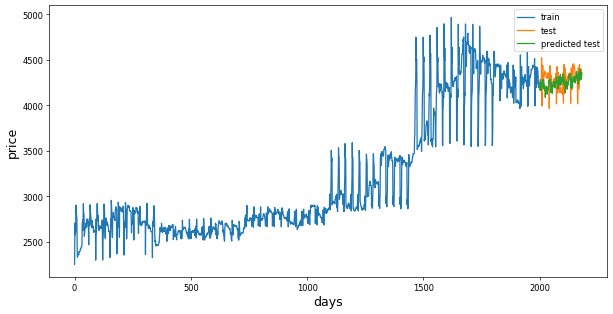

In [356]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

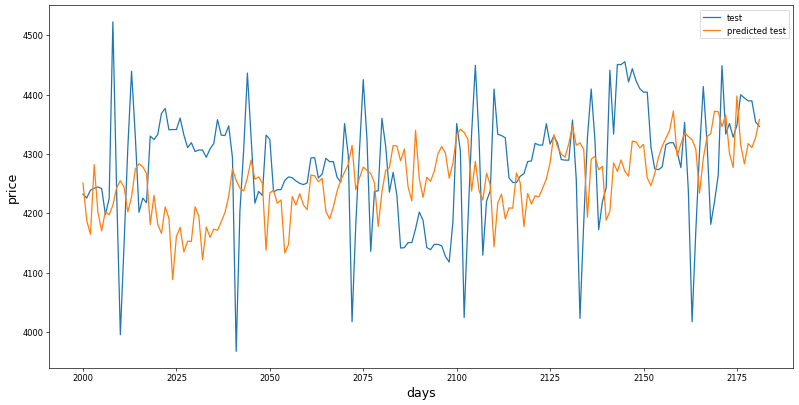

In [357]:
#train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
pred_holt.plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## model evaluation

In [358]:
# rmse:
error=mse(test["price"],pred_holt)
error

13605.202757142853

In [359]:
rmse=np.sqrt(error)
rmse

116.64134240115231

In [360]:
df["price"].mean(),np.sqrt(df["price"].var())

(3284.4500458295115, 719.5644343413472)

In [361]:
# lies within 1 standard deviation away from mean, this model gave the minimum rmse compared to others.

In [362]:
test["price"].mean()

4281.391208791207

In [363]:
# MAPE:
x=MAPE(test["price"],pred_holt)
x

2.1671245700107558

In [364]:
# accuracy for regression problem =100-MAPE
a=100-x
a

97.83287542998924

## Final model

In [207]:
df11.tail(1)

,date,price
2181,2021-12-21,4346.5


In [208]:
holt = ExponentialSmoothing(df11["price"],seasonal="mul",trend="add",seasonal_periods=86).fit()  

In [209]:
# predicting:
pred_holt = holt.forecast(30).round(2)
pred_holt

2182    4359.81
2183    4420.12
2184    4461.17
2185    4576.12
2186    4695.91
2187    4748.01
2188    4796.84
2189    4915.02
2190    4927.26
2191    4995.91
2192    4940.02
2193    4871.33
2194    4874.40
2195    4791.39
2196    4680.78
2197    4687.83
2198    4728.56
2199    4709.94
2200    4731.44
2201    4756.16
2202    4809.79
2203    4804.82
2204    4742.39
2205    4796.92
2206    4810.92
2207    4837.28
2208    4841.27
2209    4846.59
2210    4853.67
2211    4824.07
dtype: float64

In [210]:
df11.tail(1)

,date,price
2181,2021-12-21,4346.5


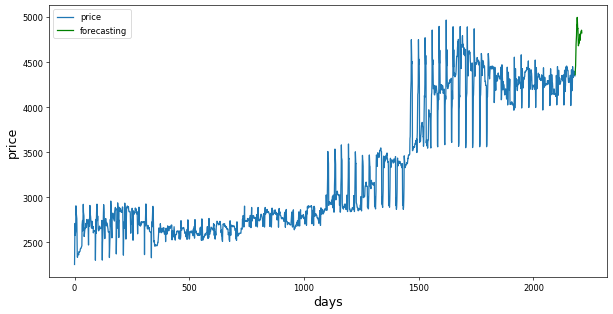

In [211]:
df11["price"].plot(legend=True, label="price",figsize=(12,6))
pred_holt.plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

In [212]:
# predicting for next 31 days, i.e for 2021-12-22 to 2022-01-20

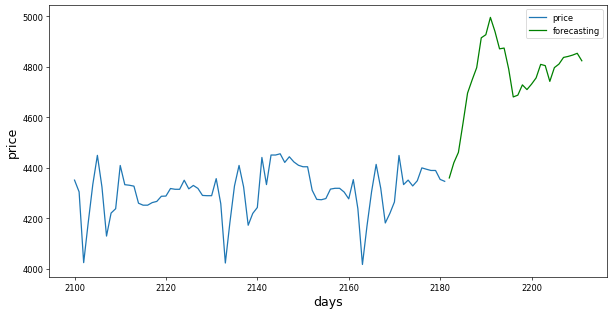

In [213]:
df11["price"][2100:].plot(legend=True, label="price",figsize=(12,6))
pred_holt.plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

In [214]:
df["price"].tail(20)

2162    4238.1
2163    4017.1
2164    4170.4
2165    4305.5
2166    4413.6
2167    4319.4
2168    4181.5
2169    4219.4
2170    4264.7
2171    4448.9
2172    4333.5
2173    4351.4
2174    4328.2
2175    4348.7
2176    4399.8
2177    4394.4
2178    4389.5
2179    4389.5
2180    4354.1
2181    4346.5
Name: price, dtype: float64